# Importing the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
import warnings

In [2]:
import re

In [3]:
warnings.filterwarnings('ignore')

# READING CSV FILE

In [4]:
playstore=pd.read_csv('../Mini Project/data/Google-Playstore-32K.csv',
                      encoding='latin1',
                      parse_dates=['Last Updated'],
                      #index_col='App Name',
                      low_memory=False,
                      )

# CLEANING OF DATA

In [7]:
playstore=playstore.fillna(0)
playstore['Latest Version']=playstore['Latest Version'].str.strip(',')
playstore['Installs']=playstore['Installs'].str.strip('+')
playstore['Rating']= pd.to_numeric(playstore['Rating'], errors='coerce').astype(float)
playstore['Reviews']= pd.to_numeric(playstore['Reviews'], errors='coerce').astype(int)
playstore['Price'] = playstore['Price'].map(lambda x: x.lstrip('$').rstrip())
playstore['Installs']=playstore['Installs'].apply(lambda x: x.replace(',','').replace('M','').replace("EDUCATION","50000"))
playstore['Installs']= pd.to_numeric(playstore['Installs'], errors='coerce').astype(int)
playstore['Price']= pd.to_numeric(playstore['Price'], errors='coerce').astype(float)

In [11]:
playstore

,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
App Name,,,,,,,,,,
DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034,5000000,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
TripAdvisor Hotels Flights Restaurants Attractions,TRAVEL_AND_LOCAL,4.400671,1207922,100000000,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
Peapod,SHOPPING,3.656329,1967,100000,1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154,10000000,16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291,10000,Varies with device,5.99,Everyone,"April 1, 2019",Varies with device,Varies with device
Safeway Online Shopping,FOOD_AND_DRINK,3.825322,2559,100000,23M,0,Everyone,"March 29, 2019",5.0 and up,7.6.0
"Yelp: Food, Shopping, Services Nearby",TRAVEL_AND_LOCAL,4.267268,421918,10000000,Varies with device,0,Teen,"March 28, 2019",Varies with device,Varies with device
Talabat: Food Delivery,FOOD_AND_DRINK,4.495085,142618,5000000,Varies with device,0,Everyone,"March 31, 2019",Varies with device,Varies with device
Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811765,85,10000,4.1M,0,Everyone,"February 10, 2019",4.3 and up,2.4


# DATA VISUALISATIONS

## 6. Most reviewed category

In [34]:
cols1=['Reviews','App Name',"Category"].copy()
max_cat_app1=playstore[cols].groupby(by='Category').max()

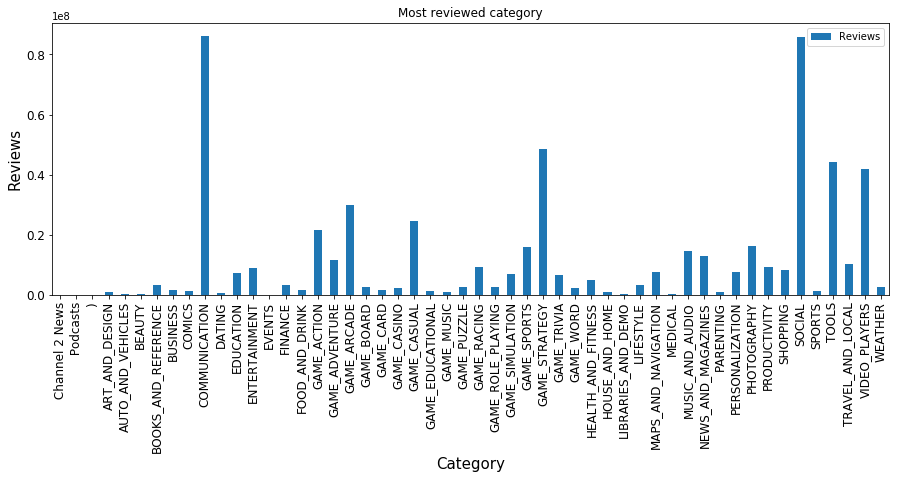

In [35]:
max_cat_app1.plot(title='Most reviewed category',
          fontsize=12,kind='bar',figsize=(15,5))

plt.xlabel('Category',fontsize=15)
plt.ylabel('Reviews',fontsize=15)
plt.savefig('graphs/Image_6.png')

## **Summary:**

*From this, we get that maximum reviewed apps in each category.Also we can imply that* **Communication** *and* **Social** *are the two most reviewed category* 

## 7. Most reviewed apps in each category

In [36]:
cols=['Reviews','App Name',"Category"].copy()
max_cat_app=playstore[cols].groupby(by='Category').max()
max_cat_app.index=max_cat_app['App Name']

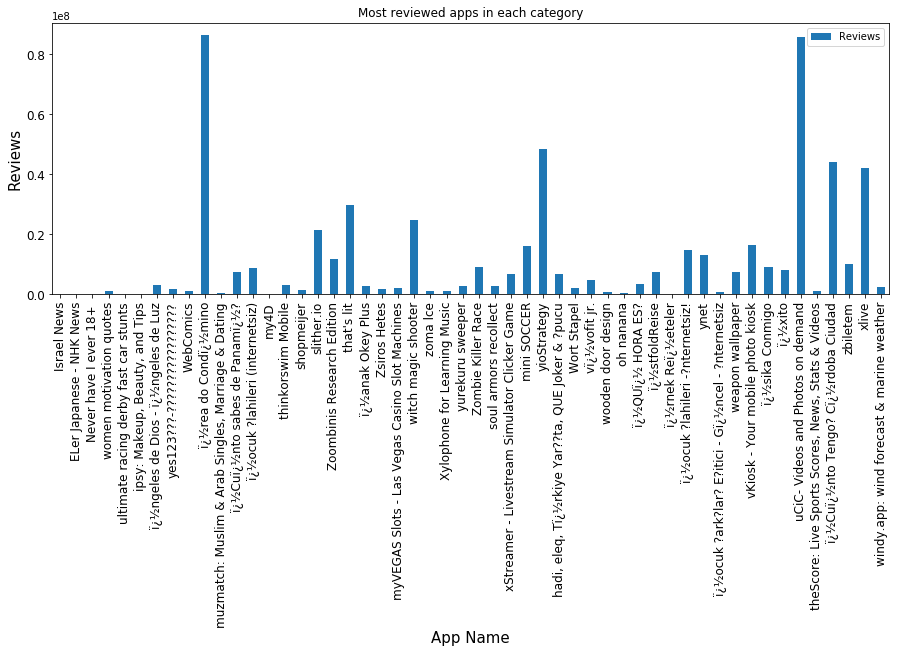

In [66]:
max_cat_app.plot(title='Most reviewed apps in each category',
          fontsize=12,kind='bar',figsize=(15,5))

plt.xlabel('App Name',fontsize=15)
plt.ylabel('Reviews',fontsize=15)
plt.savefig('graphs/Image_7.png')

## **Summary:**

*From this, we get that maximum reviewed apps in each category.Also we can imply that* **ï¿½rea do Condï¿½mino** *and* **uCiC- Videos and Photos on demand** *are the two most reviewed apps* 

## 8. Most installed apps in each category

In [57]:
cols2=['Installs','App Name',"Category"].copy()
max_cat_app2=playstore[cols2].groupby(by='Category').max()
max_cat_app2.index=max_cat_app2['App Name']

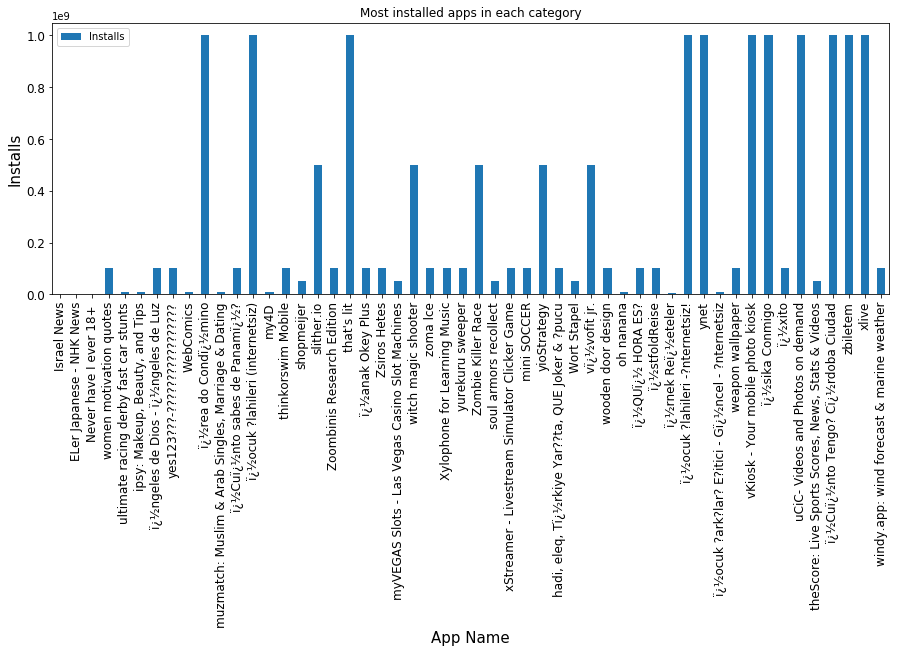

In [56]:
max_cat_app2.plot(title='Most installed apps in each category',
          fontsize=12,kind='bar',figsize=(15,5))

plt.xlabel('App Name',fontsize=15)
plt.ylabel('Installs',fontsize=15)
plt.savefig('graphs/Image_8.png')

## **Summary:**

*From this, we get that maximum installed apps in each category. Numbers of install are around* **100 Millions**

## 9. Number of paid and free apps

In [8]:
playstore.Price

0        0.00
1        0.00
2        0.00
3        0.00
4        5.99
5        0.00
6        0.00
7        0.00
8        0.00
9        0.00
10       0.00
11       0.00
12       0.00
13       0.00
14       0.00
15       0.00
16       0.00
17       0.00
18       0.00
19       0.00
20       0.00
21       0.00
22       0.00
23       0.00
24       0.00
25       0.00
26       0.00
27       0.00
28       0.00
29       0.00
         ... 
31970    0.00
31971    0.00
31972    0.00
31973    0.00
31974    0.00
31975    0.00
31976    0.00
31977    0.00
31978    0.00
31979    0.00
31980    0.00
31981    0.00
31982    0.00
31983    0.00
31984    0.00
31985    0.00
31986    0.00
31987    0.00
31988    0.00
31989    0.00
31990    0.00
31991    0.00
31992    0.00
31993    2.50
31994    0.00
31995    0.00
31996    0.00
31997    0.00
31998    0.00
31999    0.00
Name: Price, Length: 32000, dtype: float64

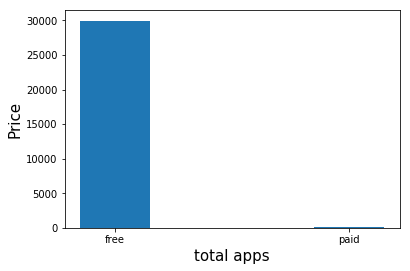

In [16]:
is_paid=playstore['Price']!=0
paid_apps=len(playstore.Price[is_paid].value_counts())

is_free=playstore['Price'].value_counts()
free_apps=is_free[0].astype(int)


plt.bar(x=['free','paid'],height=[free_apps,paid_apps],width=0.3)

plt.xlabel('total apps',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.savefig('../Mini Project/graphs/Image_9.png')


In [80]:
playstore.Price.value_counts()

0                     29950
0.99                    354
1.99                    313
2.99                    303
4.99                    233
3.99                    195
1.49                     89
2.49                     68
9.99                     56
3.49                     49
6.99                     49
5.99                     44
5.49                     32
7.99                     31
4.49                     28
8.99                     15
15.99                    10
14.99                    10
12.99                    10
1.19                     10
7.49                      8
19.99                     7
11.99                     7
2.00                      7
24.99                     6
29.99                     5
6.49                      5
9.49                      4
1.59                      3
1.29                      3
                      ...  
6.71                      1
5.33                      1
399.99                    1
45.99                     1
14.73               